In [99]:
from pathlib import Path

import anndata as ad
from IPython.core.interactiveshell import InteractiveShell

import importlib
import subcluster
importlib.reload(subcluster)

from subcluster import (
    ClusteringResult,
    ClusteringResultManager,
    plot_clustering_heatmap_2,
    run_clustering,
    update_geojson_from_clustering_result,
)

InteractiveShell.ast_node_interactivity = "all"


<module 'subcluster' from '/mnt/nfs/home/wenruiwu/projects/subclustering/subcluster.py'>

# Demo Data


In [2]:
adata = ad.read_h5ad("input/data_demo.h5ad")[0:1000].copy()
adata

AnnData object with n_obs × n_vars = 1000 × 46
    obs: 'id', 'cellLabel', 'cellSize', 'Y_cent', 'X_cent', 'tma'

In [3]:
# single cell data
adata.X
adata.to_df().head()

array([[3.36001928e-01, 8.51124647e-02, 3.07375298e-01, ...,
        1.95495360e-03, 0.00000000e+00, 9.63720695e-04],
       [2.46858923e-01, 4.89802643e-04, 0.00000000e+00, ...,
        2.26652879e-03, 0.00000000e+00, 1.30542269e-03],
       [0.00000000e+00, 4.89802643e-04, 8.35764486e-04, ...,
        2.26652879e-03, 0.00000000e+00, 1.30542269e-03],
       ...,
       [6.91708254e-02, 1.99898512e-02, 1.16875698e-01, ...,
        2.26652879e-03, 1.28645558e-03, 1.30542269e-03],
       [5.22985221e-01, 3.12477095e-01, 3.30165374e-01, ...,
        1.61331732e-03, 2.39572690e-03, 7.09762954e-04],
       [2.74424259e-01, 4.89802643e-04, 8.35764486e-04, ...,
        2.26652879e-03, 2.39572690e-03, 1.30542269e-03]])

,DAPI,CD45,CD3e,CD8,CD4,CD45RO,CD45RA,CD69,CD57,CD56,...,P53,CD31,Podoplanin,aSMA,NaKATP,VDAC1,ATP5A,GLUT1,G6PD,CD68
cell_id,,,,,,,,,,,,,,,,,,,,,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,0.336002,0.085112,0.307375,0.070482,0.000273,0.540095,0.000000,0.000881,0.001268,0.000000,...,0.002346,0.001642,0.002723,0.001407,0.000000,0.089605,0.442195,0.001955,0.000000,0.000964
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c5,0.246859,0.000490,0.000000,0.000087,0.000588,0.000000,0.000621,0.001371,0.001490,0.000131,...,0.003231,0.000103,0.000250,1.000000,0.001021,0.000417,0.210098,0.002267,0.000000,0.001305
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c6,0.000000,0.000490,0.000836,0.000573,0.001460,0.005088,0.000621,0.001371,0.001490,0.000000,...,0.000547,0.001642,0.002982,1.000000,0.000373,0.000348,0.052819,0.002267,0.000000,0.001305
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,0.784460,0.431749,0.576645,0.056420,0.057027,0.792592,0.000621,0.001033,0.001329,0.000265,...,0.003281,0.001300,0.001172,0.000321,0.138844,0.015125,0.279266,0.002056,0.000000,0.000936
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,0.040196,0.000490,0.005417,0.000154,0.000811,0.001315,0.000078,0.001371,0.001490,0.000775,...,0.000005,0.103594,0.002982,0.779664,0.000000,0.000452,0.111498,0.002267,0.000035,0.001305


In [4]:
# metadata
adata.obs.head()

,id,cellLabel,cellSize,Y_cent,X_cent,tma
cell_id,,,,,,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,2,173,4.069364,2776.838150,TMA609
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c5,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,5,191,5.188482,3305.136126,TMA609
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c6,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,6,162,4.543210,3637.746914,TMA609
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,7,346,5.956647,2798.722543,TMA609
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005,9,355,5.839437,3169.946479,TMA609


# Preparation

In [57]:
# Output directory
output_dir = "/mnt/nfs/home/wenruiwu/projects/subclustering/output/clustering_demo"
Path(output_dir).mkdir(parents=True, exist_ok=True)

# markers for clustering
markers_all = [
    "CD45",
    "CD3e",
    "CD8",
    "CD4",
    "FoxP3",
    "CD20",
    "CD68",
    "CD163",
    "CD16",
    "CD11b",
    "MPO",
    "Cytokeratin",
    "CD31",
    "Podoplanin",
    "aSMA",
]
markers_t = ["CD3e", "CD8", "CD4", "FoxP3"]
markers_b = ["CD20"]
markers_m = ["CD16", "CD163", "CD68"]
markers_nonimmune = ["Cytokeratin", "CD31", "Podoplanin", "aSMA"]
# and so on


# Initial Clustering

## Clustering with Phenograph

In [6]:
# use ClusteringResultManager to manage clustering results
manager = ClusteringResultManager(output_dir=output_dir, unit_ids=adata.obs.index)

# if no clustering results, you can use all cells for the first clustering

No clustering sequence found.


In [7]:
unit_ids = adata.obs.index  # use all cells
features = markers_all  # markers for clustering

# clustering using phenograph
clustering_result = run_clustering(
    adata, unit_ids, features, method="phenograph", method_params={"k": 30}
)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.04171490669250488 seconds
Jaccard graph constructed in 0.19592046737670898 seconds
Wrote graph to binary file in 0.010214090347290039 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.826402
Louvain completed 21 runs in 0.20581364631652832 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 0.605637788772583 seconds


In [8]:
# clustering result
clustering_result.cluster_df

,clustering_id,method,unit_ids,cluster_ids
0,363f6ab2-4284-4205-913f-a09195723379,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,2
1,363f6ab2-4284-4205-913f-a09195723379,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c5,3
2,363f6ab2-4284-4205-913f-a09195723379,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c6,3
3,363f6ab2-4284-4205-913f-a09195723379,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,2
4,363f6ab2-4284-4205-913f-a09195723379,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,7
...,...,...,...,...
995,363f6ab2-4284-4205-913f-a09195723379,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1750,0
996,363f6ab2-4284-4205-913f-a09195723379,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1751,0
997,363f6ab2-4284-4205-913f-a09195723379,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1752,8
998,363f6ab2-4284-4205-913f-a09195723379,phenograph,RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1753,2


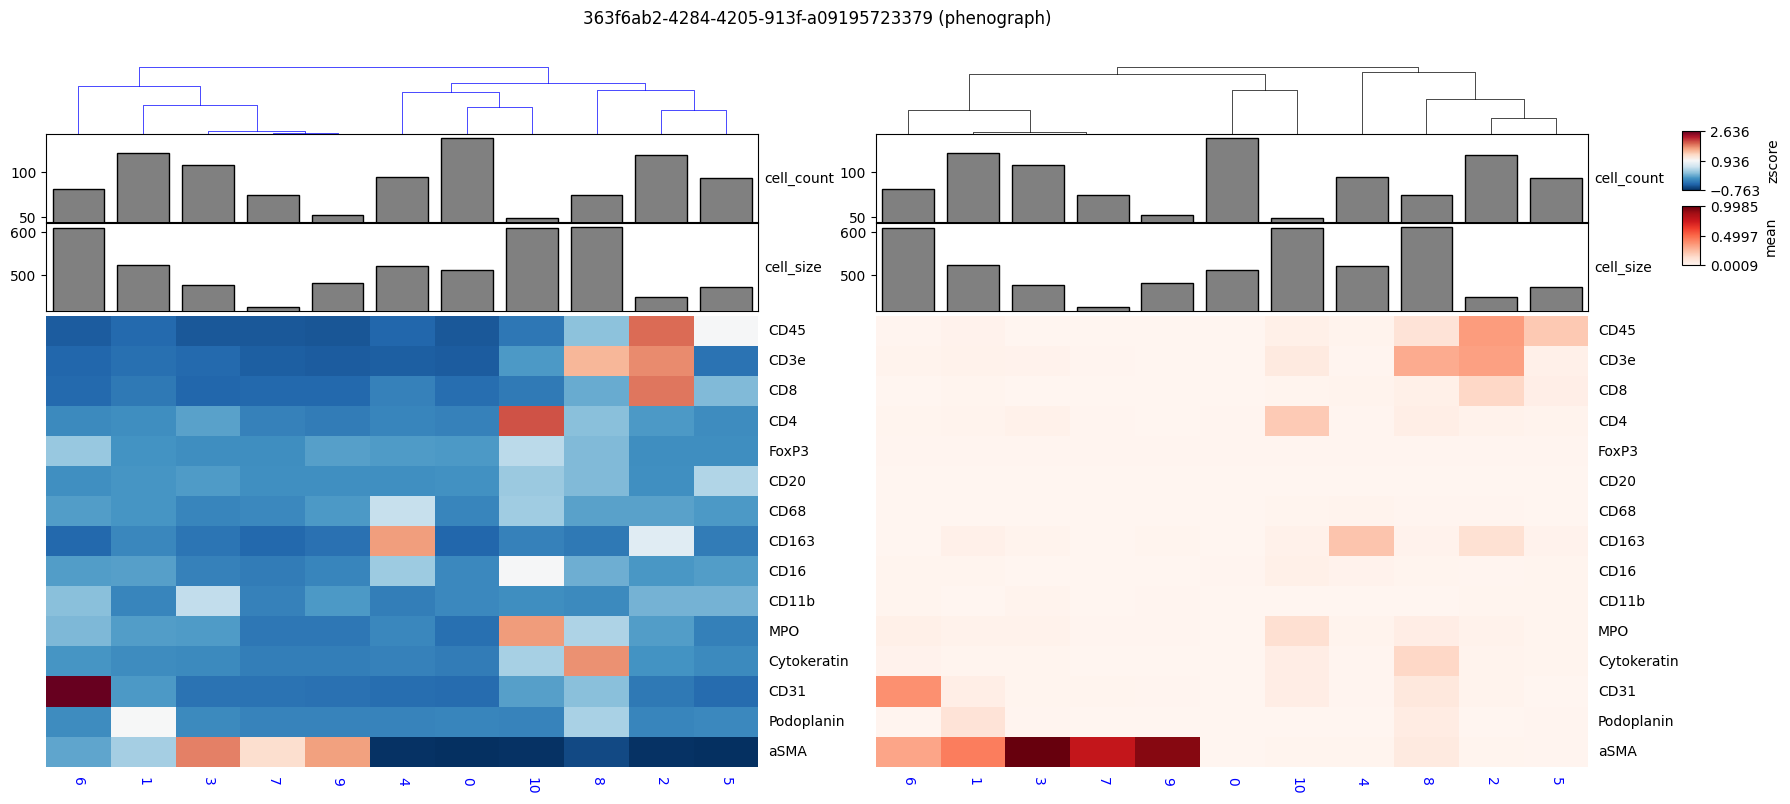

In [9]:
# plot heatmap without value limit
features = markers_all  # markers for visualization (not necessary to be the same as clustering)
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    col_gap=30,
    legend_hpad=60,
)

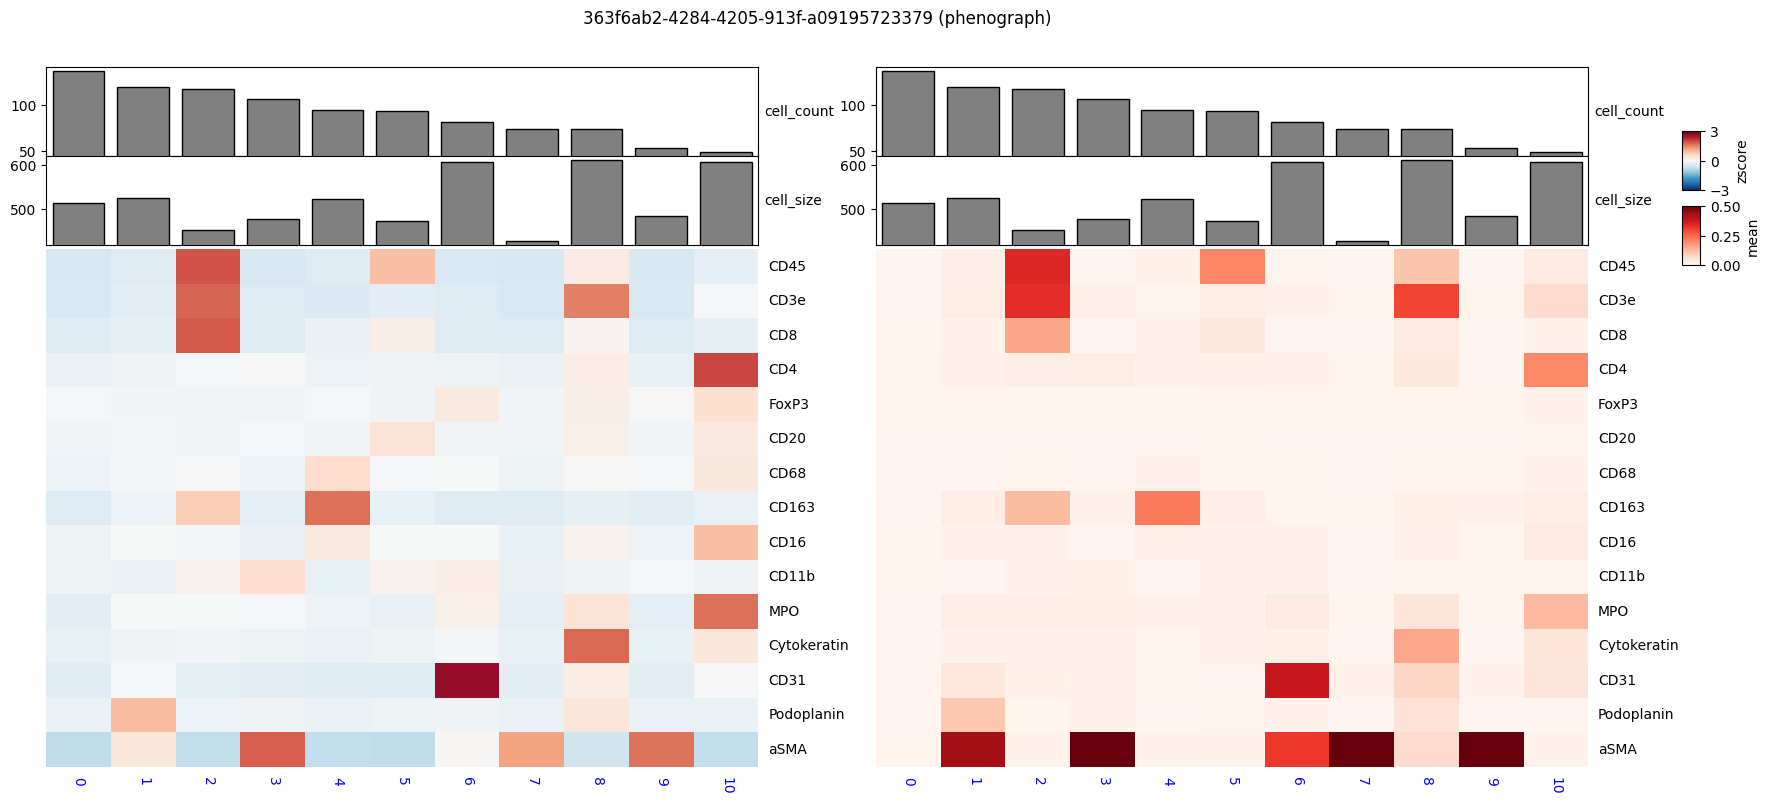

In [10]:
# plot heatmap with value limit, and turn off column clustering
features = markers_all  # markers for visualization (not necessary to be the same as clustering)
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    col_gap=30,
    legend_hpad=60,
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)

In [27]:
# check whether cells of a core are involved in the clustering
pattern = "RCC-TMA609(reg_4x5)-dst=reg019-src=reg005"
n_match = len([unit_id for unit_id in clustering_result.unit_ids if pattern in unit_id])
if n_match > 0:
    print(f"Found {n_match} units for {pattern} in this clustering")
else:
    print(f"No unit found for pattern '{pattern} in this clustering")

Found 1000 units for RCC-TMA609(reg_4x5)-dst=reg019-src=reg005 in this clustering


In [28]:
# generate geojson to visualize the clustering result
geojson_file = Path(
    "/mnt/nfs/home/wenruiwu/projects/bidmc-jiang-rcc/output/data/20250324_update_geojson_R/geojson/RCC-TMA609(reg_4x5)-dst=reg019-src=reg005.geojson"
)
update_geojson_from_clustering_result(geojson_file, clustering_result, output_dir)


Skipped 0 geometries: 


In [ ]:
# for explicit clusters, add annotation
# units with annotation will be skipped for next clustering
clustering_result.add_annotation(
    {
        "0": "Toss",
        "1": "Muscle-like",
        "3": "Muscle-like",
        "4": "M",
        "5": "T",
        "6": "Endothelial",
        "7": "Muscle-like",
        "9": "Muscle-like",
    },
)

# for explicit clusters, it is recommended to add tag
# tag will be helpful for selecting units for next clustering
clustering_result.add_tag(
    {"2": "T_M", "8": "T_Other", "10": "T_M"},
    tag_name="tag",
)

Overwrite the existing annotation column.
Overwrite the existing tag column.


In [17]:
# If you need to leave and want to continue later, you can stash the clustering result temporarily
clustering_result.stash(output_dir=output_dir)

To reload the stashed clustering result:
ClusteringResult.pop(
    clustering_id='363f6ab2-4284-4205-913f-a09195723379',
    output_dir='/mnt/nfs/home/wenruiwu/projects/subclustering/output/clustering_demo'
)


In [32]:
# After stashing, you can pop the clustering result
clustering_result = ClusteringResult.pop(
    clustering_id="363f6ab2-4284-4205-913f-a09195723379",
    output_dir="/mnt/nfs/home/wenruiwu/projects/subclustering/output/clustering_demo",
)

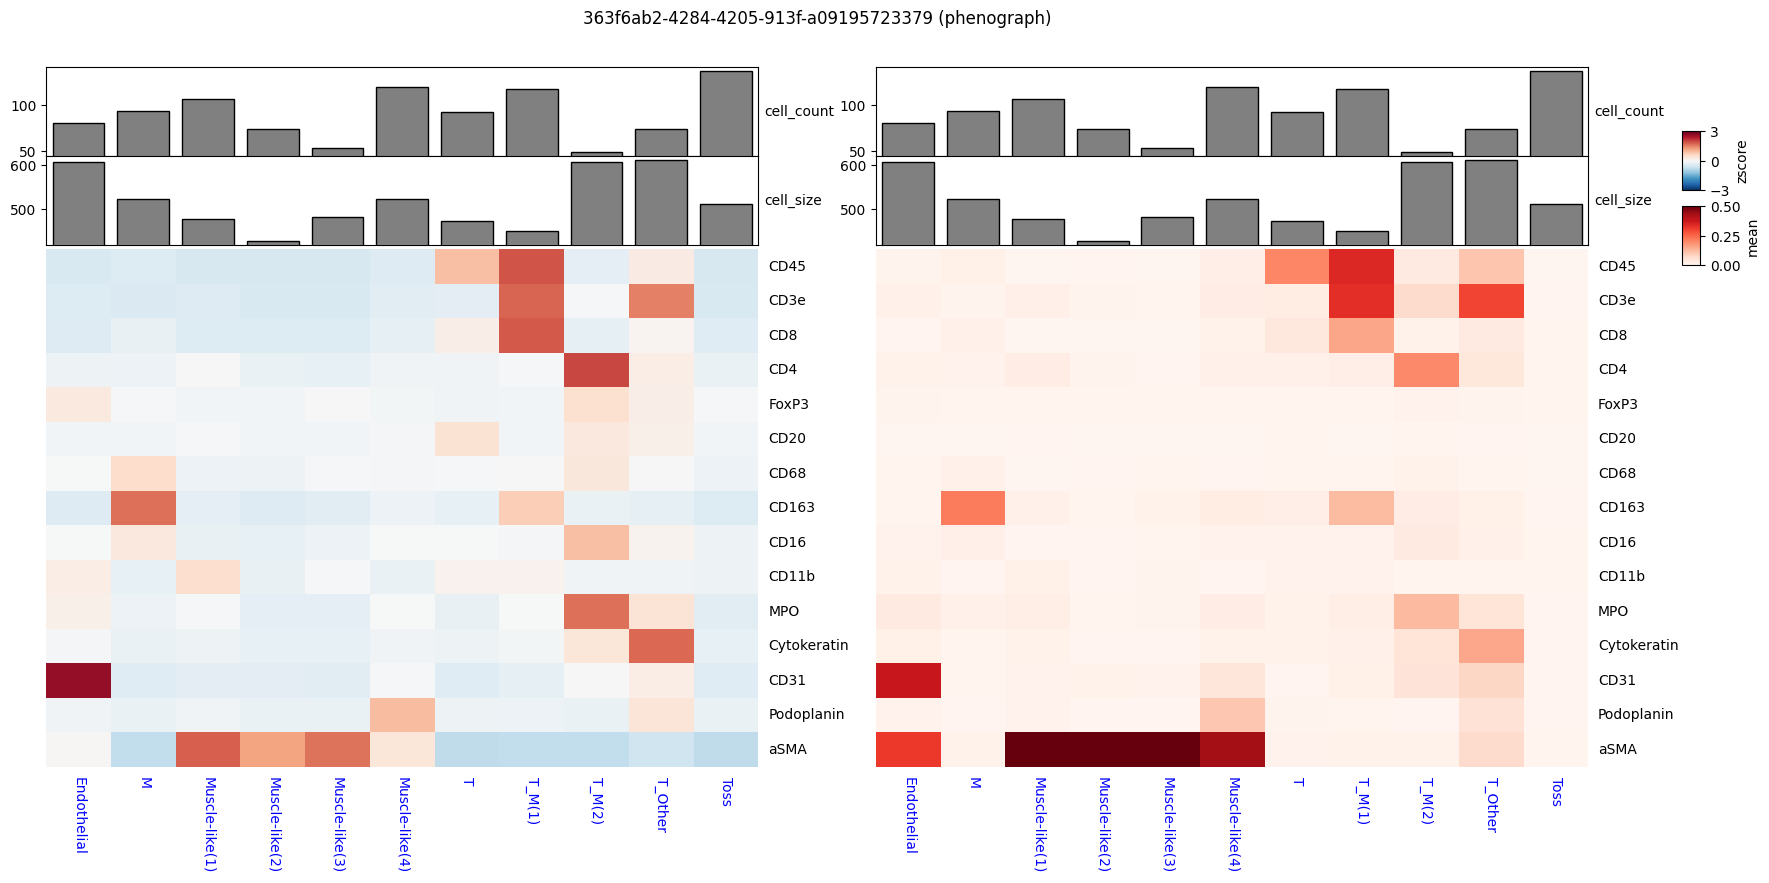

In [33]:
# plot heatmap with updated annotations and tags
features = markers_all  # markers for visualization (not necessary to be the same as clustering)
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="tag",
    col_gap=30,
    legend_hpad=60,
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)


In [20]:
# save the clustering result if the annotation and tag are correct
clustering_result.save(output_dir)

# Subclustering 1

In [34]:
# use ClusteringResultManager to manage clustering results
manager = ClusteringResultManager(output_dir=output_dir, unit_ids=adata.obs.index)

# summary of clustering results
manager.summary_df

,363f6ab2-4284-4205-913f-a09195723379,latest_cluster_id,annotation,clustering_id,tag
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,2,2,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c5,3,3,Muscle-like,363f6ab2-4284-4205-913f-a09195723379,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c6,3,3,Muscle-like,363f6ab2-4284-4205-913f-a09195723379,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,2,2,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c9,7,7,Muscle-like,363f6ab2-4284-4205-913f-a09195723379,
...,...,...,...,...,...
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1750,0,0,Toss,363f6ab2-4284-4205-913f-a09195723379,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1751,0,0,Toss,363f6ab2-4284-4205-913f-a09195723379,
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1752,8,8,,,T_Other
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1753,2,2,,,T_M


In [35]:
# cells with no annotation need to be subclustered
manager.non_explicit_df

# tag will be helpful for selecting units for next clustering
manager.non_explicit_df.tag.value_counts()

# select units for next clustering
unit_ids = manager.non_explicit_df.query("tag == 'T_M'").index
unit_ids

,363f6ab2-4284-4205-913f-a09195723379,latest_cluster_id,annotation,clustering_id,tag
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2,2,2,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7,2,2,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c13,2,2,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c14,2,2,,,T_M
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c17,2,2,,,T_M
...,...,...,...,...,...
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1737,8,8,,,T_Other
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1742,8,8,,,T_Other
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1745,8,8,,,T_Other
RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1752,8,8,,,T_Other


tag
T_M        167
T_Other     74
Name: count, dtype: int64

Index(['RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c2',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c7',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c13',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c14',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c17',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c25',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c27',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c30',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c36',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c37',
       ...
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1491',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1514',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1521',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1538',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1663',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1697',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c1706',
       'RCC-TMA609(reg_4x

In [ ]:
# clustering using phenograph with T and Macrophage markers
clustering_result = run_clustering(
    adata,
    unit_ids,
    features=markers_t + markers_m,
    method="phenograph",
    method_params={"k": 50},
)
# clustering_result = ClusteringResult.from_csv("output/clustering_demo/clustering_results/adcb6652-72f1-4460-81d1-c78cf01c6429.csv")

Finding 50 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.1001887321472168 seconds
Jaccard graph constructed in 0.6182336807250977 seconds
Wrote graph to binary file in 0.0019271373748779297 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.236561
Louvain completed 21 runs in 0.08217811584472656 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 2.0084636211395264 seconds


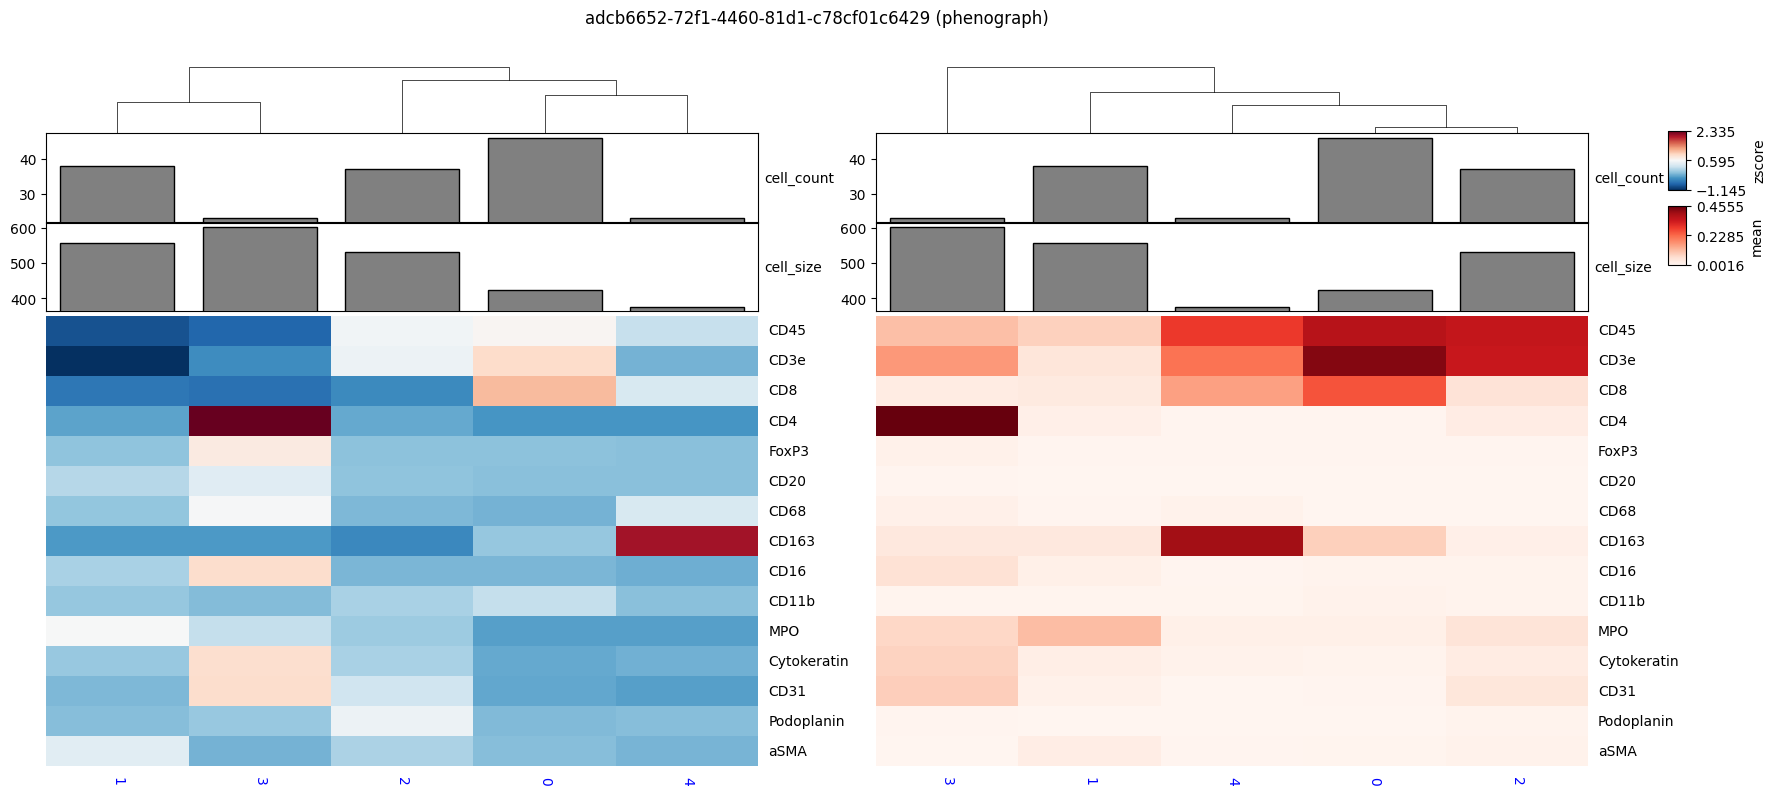

In [109]:
# plot heatmap without value limit
features = markers_all
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
)


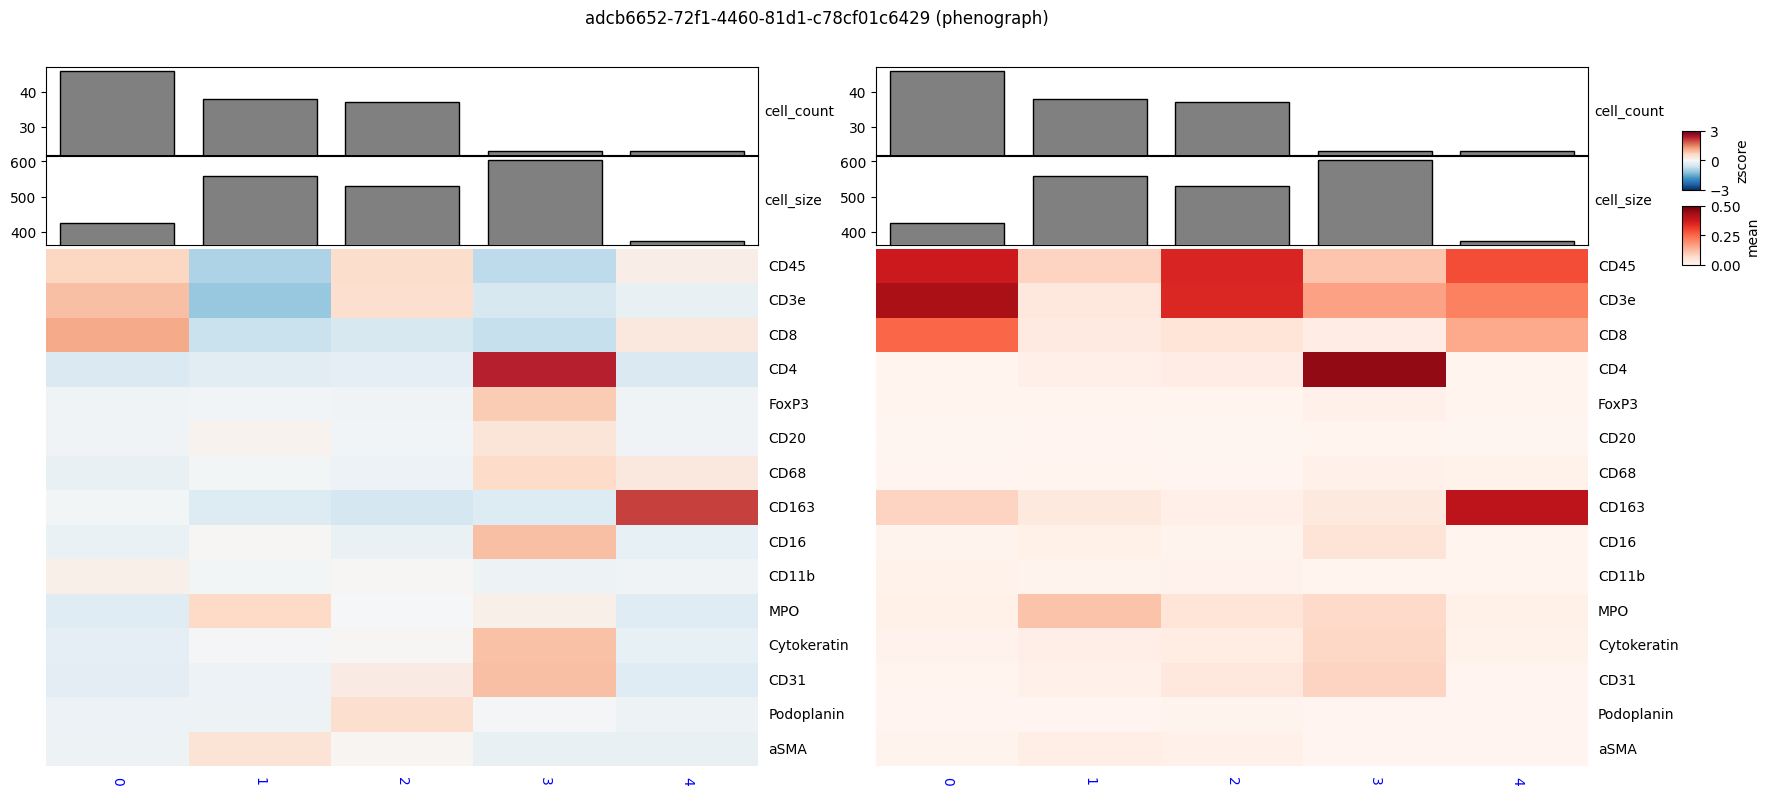

In [110]:
# plot heatmap with value limit
features = markers_all
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    col_gap=30,
    legend_hpad=60,
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)


In [47]:
# add annotation
clustering_result.add_annotation(
    {"0": "CD8T", "1": "Neutrophil", "2": "CD8T", "3": "CD4T", "4": "M"}
)

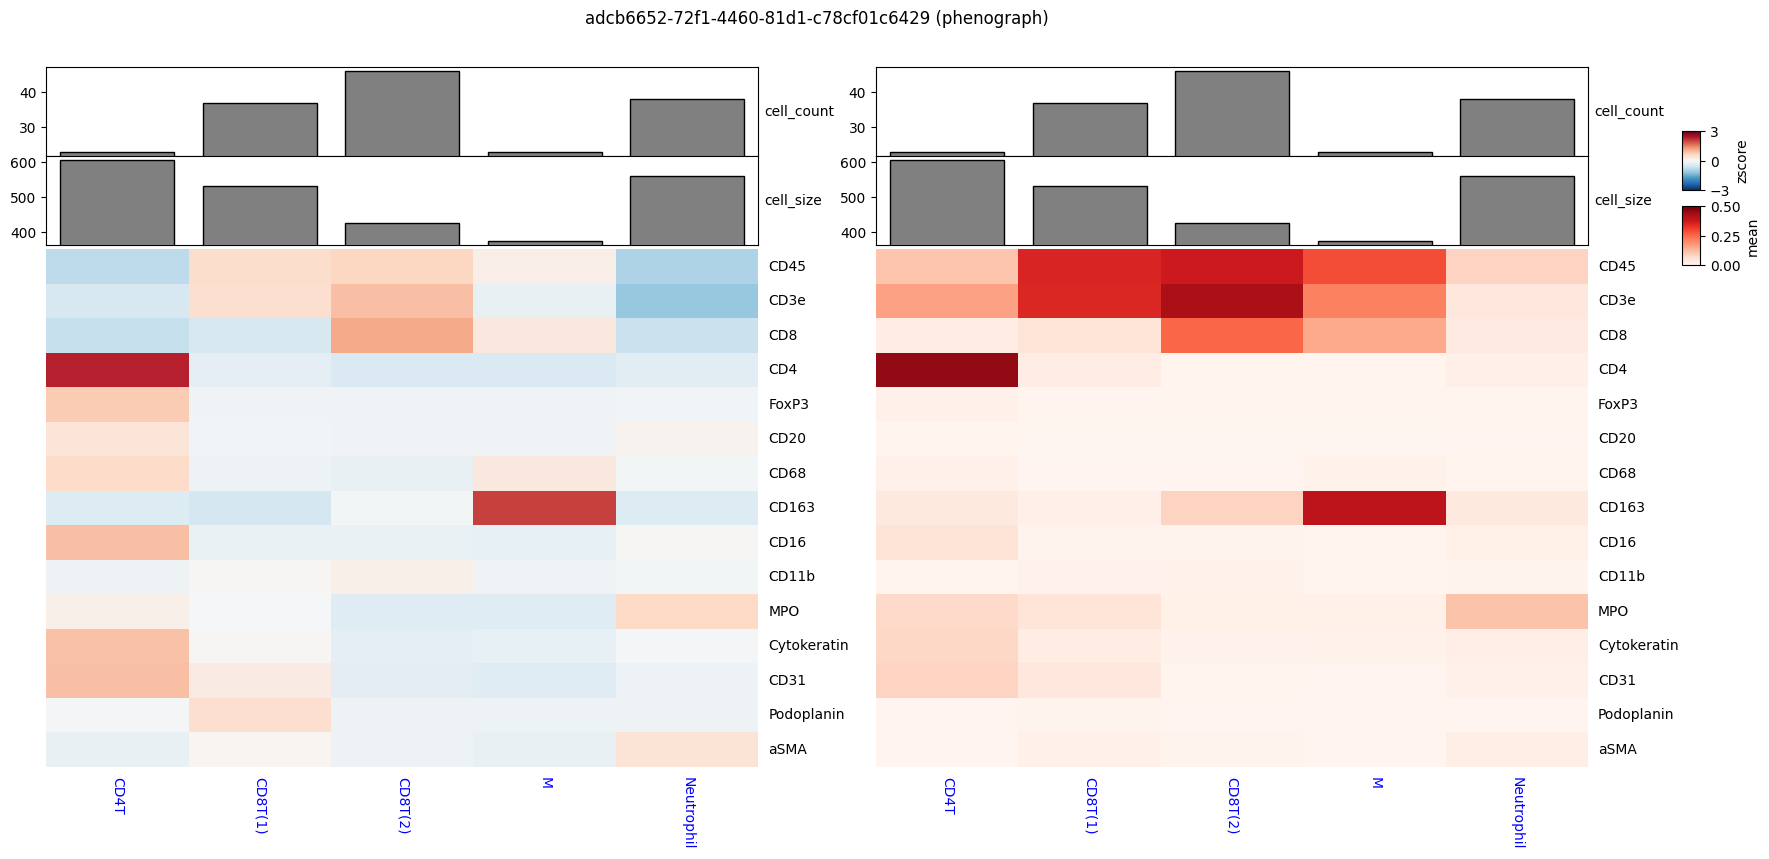

In [ ]:
# plot heatmap with updated annotations
features = markers_all  # markers for visualization (not necessary to be the same as clustering)
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="annotation",  # x_label can be "tag" or "annotation", if all units are annotated, use "annotation"
    col_gap=30,
    legend_hpad=60,
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)

In [50]:
# save the clustering result if the annotation and tag are correct
clustering_result.save(output_dir)

# Subclustering 2

In [52]:
# use ClusteringResultManager to manage clustering results
manager = ClusteringResultManager(output_dir=output_dir, unit_ids=adata.obs.index)

# cells with no annotation need to be subclustered
len(manager.non_explicit_df)
manager.non_explicit_df.tag.value_counts()

# select units for next clustering
unit_ids = manager.non_explicit_df.query("tag == 'T_Other'").index
unit_ids

74

tag
T_Other    74
Name: count, dtype: int64

Index(['RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c26',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c45',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c46',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c114',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c149',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c194',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c252',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c276',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c299',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c337',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c377',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c401',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c403',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c414',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c437',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c447',
       'RCC-TMA609(reg_4x5)-dst=reg019-src=reg005_c476',
       'RCC-TMA609(reg_4x5)-dst=re

In [83]:
# clustering using phenograph with T and B markers
clustering_result = run_clustering(
    adata,
    unit_ids,
    features=markers_nonimmune,
    method="phenograph",
    method_params={"k": 10},
)


Finding 10 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.02111649513244629 seconds
Jaccard graph constructed in 0.5201194286346436 seconds
Wrote graph to binary file in 0.0010237693786621094 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.654308
After 13 runs, maximum modularity is Q = 0.655364
Louvain completed 33 runs in 0.13557839393615723 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 1.449979543685913 seconds


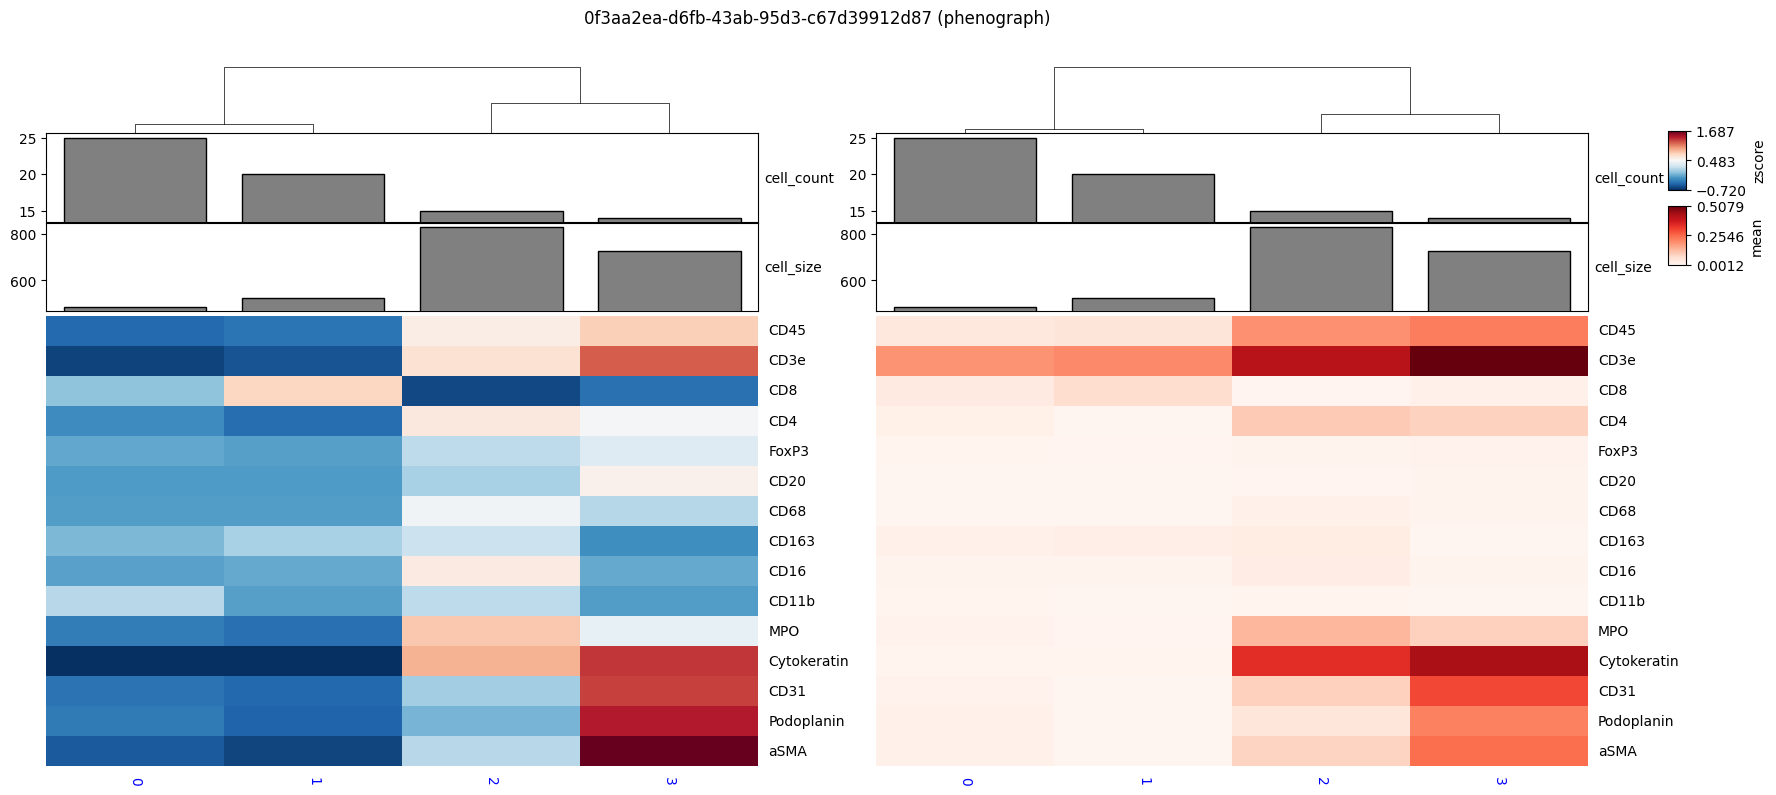

In [84]:
# plot heatmap without value limit
features = markers_all
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="tag",
)


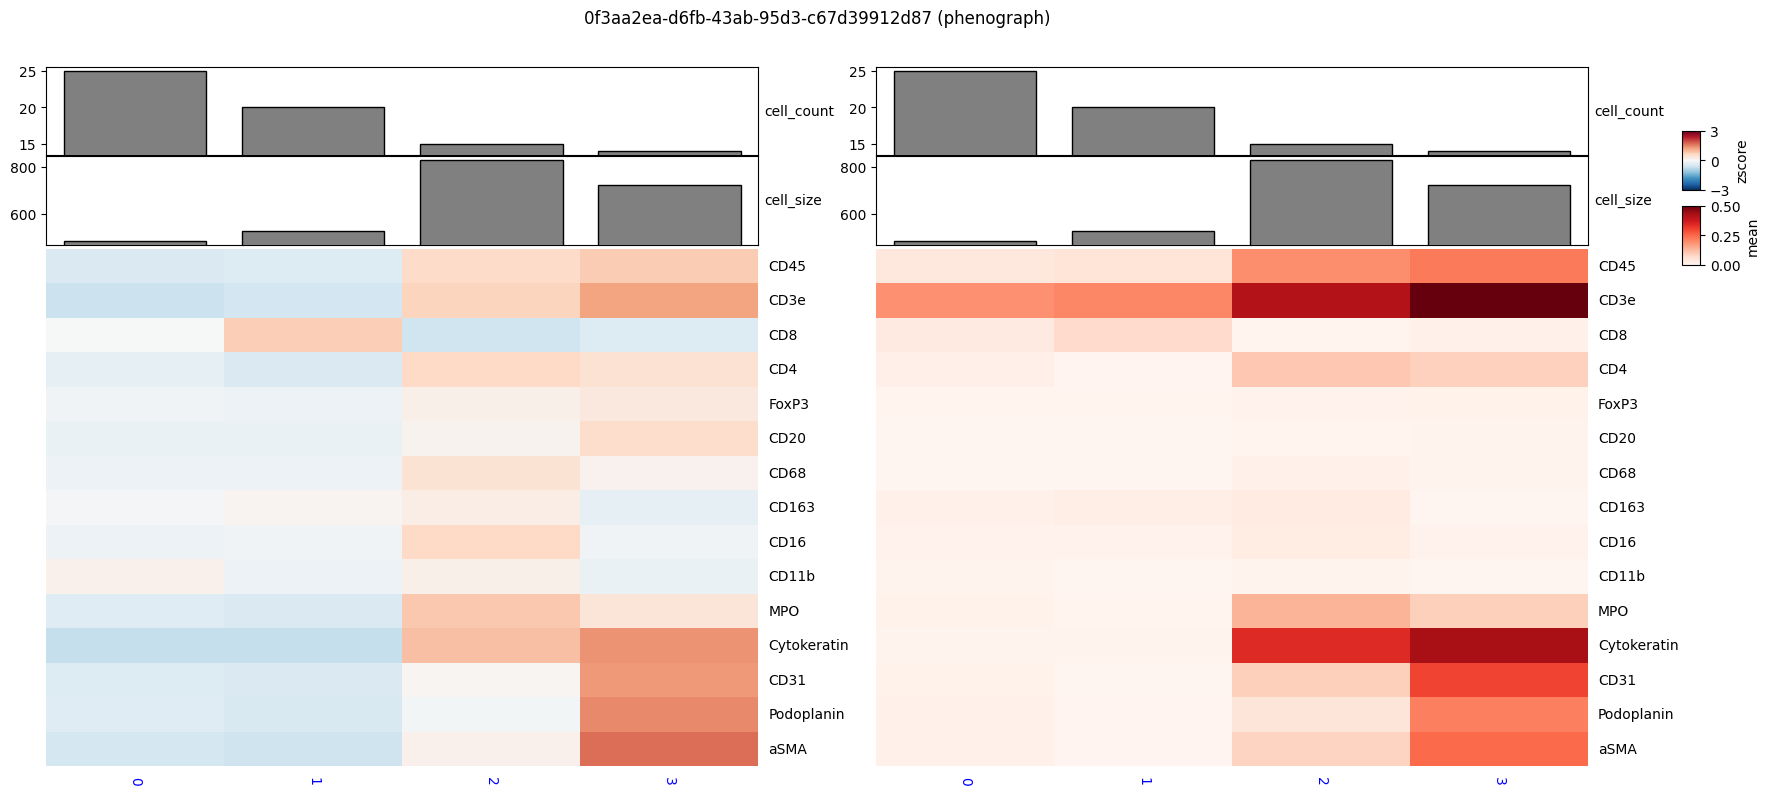

In [85]:
# plot heatmap with value limit
features = markers_all
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="tag",
    col_gap=30,
    legend_hpad=60,
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)


In [101]:
# add annotation and tag
clustering_result.add_annotation(
    {"0": "T", "1": "CD8T", "2": "Other"}
)

clustering_result.add_tag(
    {"3": "T_Other"},
    tag_name="tag_2", # you can use another tag name
)


Overwrite the existing annotation column.
Overwrite the existing tag_2 column.


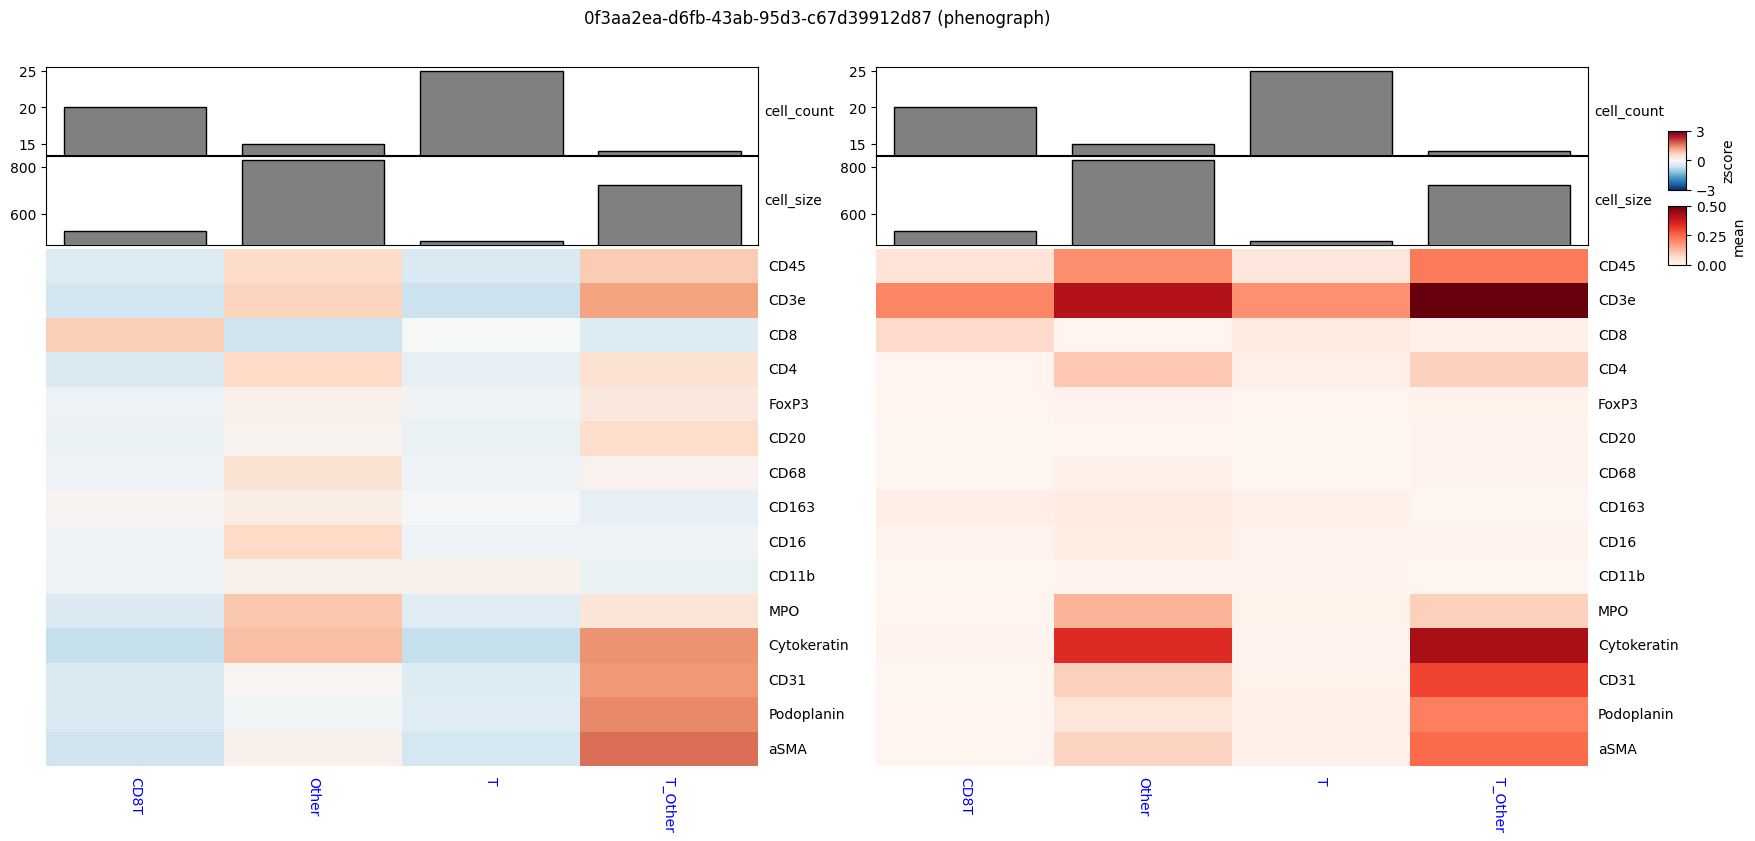

In [102]:
# plot heatmap with value limit
features = markers_all
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    clustering_result,
    features,
    figsize=(20, 8),
    x_label="tag_2",
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)


In [103]:
clustering_result.save(output_dir)

# Final Heatmap


In [104]:
manager = ClusteringResultManager(output_dir=output_dir, unit_ids=adata.obs.index)
len(manager.non_explicit_df)

14

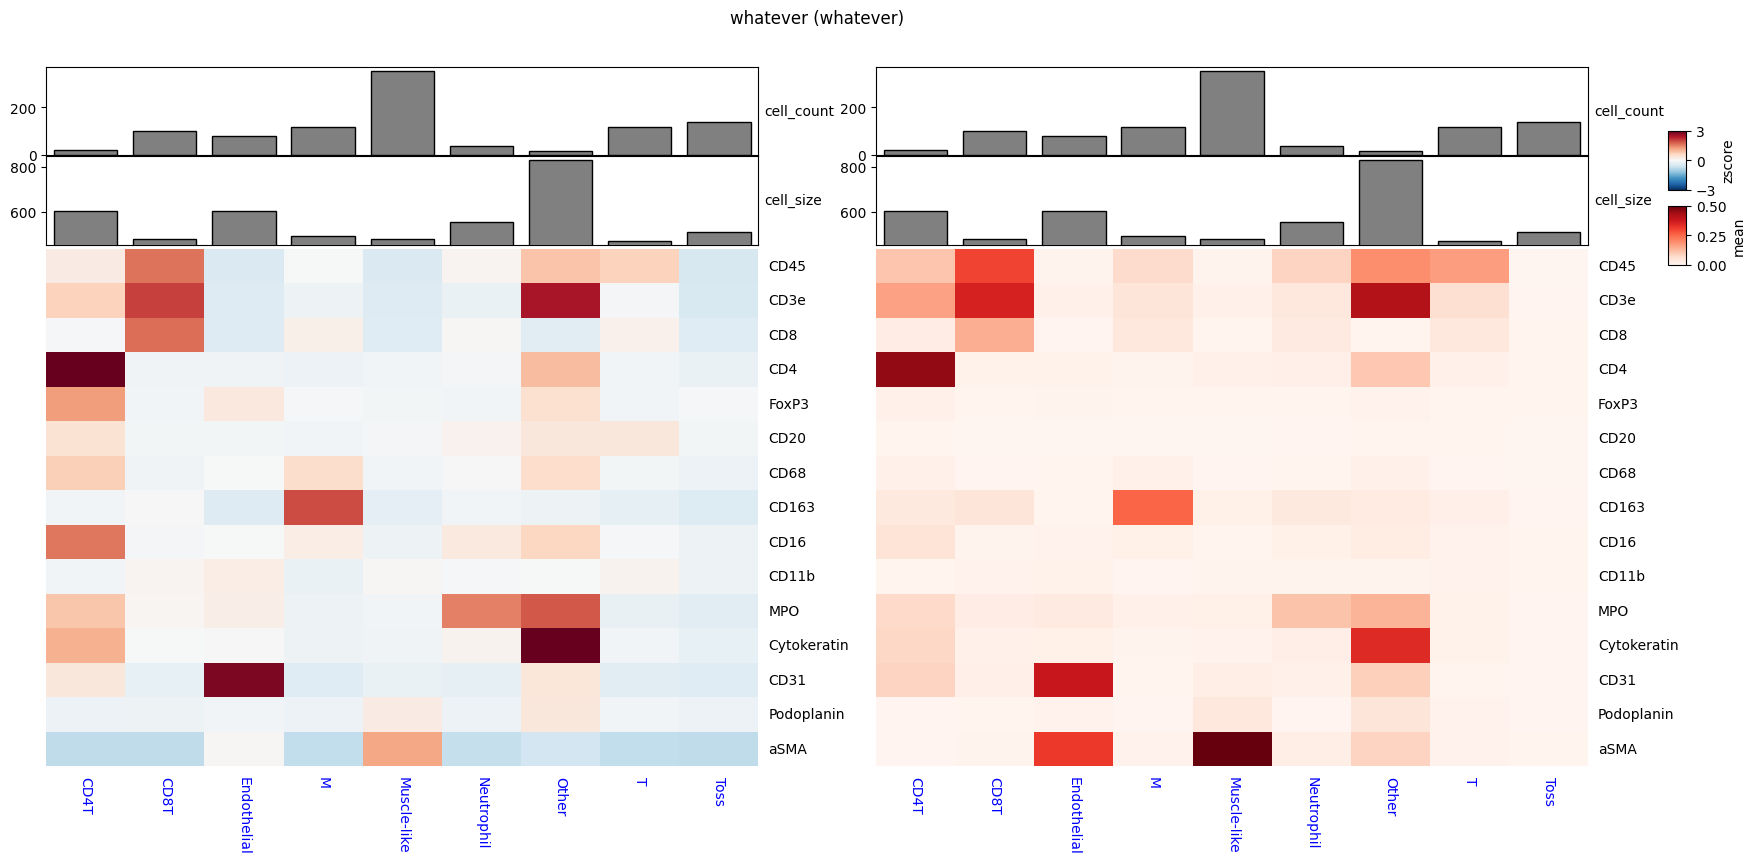

In [106]:
idx_annotated = manager.summary_df.annotation != ""
result = ClusteringResult(
    clustering_id="whatever",
    method="whatever",
    unit_ids=manager.summary_df.index[idx_annotated],
    cluster_ids=manager.summary_df.annotation[idx_annotated],
)
non_col_cluster = {"col_cluster": False, "col_dendrogram": False}
plot_clustering_heatmap_2(
    adata,
    result,
    features,
    figsize=(20, 8),
    x_label="annotation",
    kwargs_zscore={"vmin": -3, "center": 0, "vmax": 3} | non_col_cluster,
    kwargs_mean={"vmin": 0, "vmax": 0.5} | non_col_cluster,
)
